## **1. Import tensorflow libraries**
---

In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import add
from tensorflow.keras.utils import plot_model

## **2. Create the model illustrated in DualTw_model.pdf (to be completed)**
---

In [72]:
def createDualTwModel():

    Lin = Input(shape=(32,32,3))
    Lx = Conv2D(16,(3,3),padding='same',activation='relu')(Lin)
    Lx = Conv2D(16,(16,16),padding='same',activation='relu')(Lx)
    Lx = MaxPooling2D(pool_size=(2,2))(Lx)
    Lx = Conv2D(32,(16,16),padding='same',activation='relu')(Lx)
    Lx = MaxPooling2D(pool_size=(2,2))(Lx)
    Lx = Conv2D(48,(16,16),padding='same',activation='relu')(Lx)
    Lx = MaxPooling2D(pool_size=(2,2))(Lx)
    Lx = Conv2D(64,(16,16),padding='same',activation='relu')(Lx)
    Lx = MaxPooling2D(pool_size=(2,2))(Lx)
    
    Rin = Input(shape=(16,16,3))
    Rx  = Conv2D(16,(3,3),padding='same',activation='relu')(Rin)
    Rx  = Conv2D(16,(16,16),padding='same',activation='relu')(Rx)
    Rx = MaxPooling2D(pool_size=(2,2))(Rx)
    Rx = Conv2D(48,(16,16),padding='same',activation='relu')(Rx)
    Rx = MaxPooling2D(pool_size=(2,2))(Rx)
    Rx = Conv2D(64,(16,16),padding='same',activation='relu')(Rx)
    Rx = MaxPooling2D(pool_size=(2,2))(Rx)
    x = concatenate([Lx,Rx],axis=-1)
    x = Flatten()(x)
    x = Dense(128,activation='softmax')(x)
    x = Dense(3,activation='softmax')(x)
    model = Model(inputs=[Lin,Rin],outputs=x)
    model.compile(loss='categorical_crossentropy', 
                  optimizer='rmsprop', 
                  metrics=['accuracy'])
    
    return model


modelDualTw = createDualTwModel()
modelDualTw.summary()

Model: "model_31"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_76 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_190 (Conv2D)             (None, 32, 32, 16)   448         input_76[0][0]                   
__________________________________________________________________________________________________
conv2d_191 (Conv2D)             (None, 32, 32, 16)   65552       conv2d_190[0][0]                 
__________________________________________________________________________________________________
input_77 (InputLayer)           [(None, 16, 16, 3)]  0                                            
___________________________________________________________________________________________

## **3. Plot the model**
---

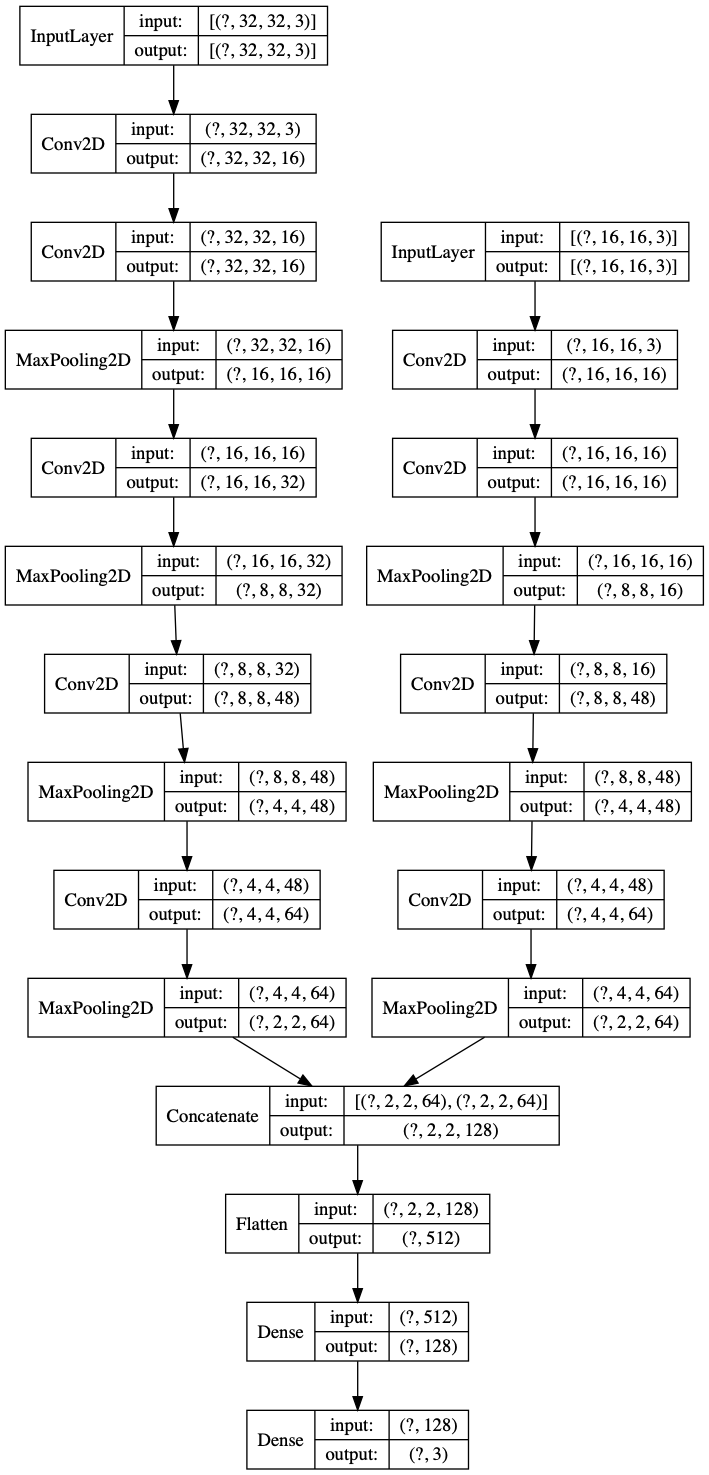

In [73]:
plot_model(modelDualTw, 
           to_file='DualTw_model.png', 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='TB')